In [1]:
import os,sys
smodelsPath = os.path.expanduser('~/smodels')
sys.path.append(smodelsPath)
from smodels.experiment.databaseObj import Database
from smodels.tools.physicsUnits import GeV
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.special import kn,zetac
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))
cm = plt.cm.get_cmap('RdYlBu')

In [ ]:
db = Database('/home/lessa/smodels-database')

In [ ]:
exp = db.getExpResults(analysisIDs = 'ATLAS-SUSY-2016-32', dataTypes = 'efficiencyMap')[0]
print(exp)

In [5]:
dataset = [ds for ds in exp.datasets if ds.dataInfo.dataId == SR][0]
txname = [t for t in dataset.txnameList if t.txName == tx][0]
print(len(txname.txnameData.tri.points))

results = []
for pt in data:
    massvals = [pt[mlabel] for mlabel in ['mprod','mint','mhscp'] if mlabel in data.dtype.names]
    width = 0.0
    if 'width' in data.dtype.names:
        width = pt['width']
    
    mass = [m*GeV for m in massvals]
    mass[-1] = tuple([mass[-1],width*GeV])
    mass = [mass]*2
    eff = pt[SR]
    effInterp = txname.txnameData.getValueFor(mass)
    results.append(massvals + [width,eff,effInterp])

32197


In [6]:
results = np.array(results)

In [7]:
print(results.shape)

(84256, 6)


In [8]:
relDiff = np.where(results[:,-2] > 1e-8, np.abs(results[:,-1]-results[:,-2])/results[:,-2],results[:,-1])
print(relDiff.max(),results[np.argmax(relDiff)])

0.21643599735130922 [4.0000000e+03 1.5500000e+02 1.5000000e+02 4.6000000e-16 2.6902498e-08
 3.2725167e-08]


<ipython-input-8-80f877687c06>:1: RuntimeWarning: divide by zero encountered in true_divide
  relDiff = np.where(results[:,-2] > 1e-8, np.abs(results[:,-1]-results[:,-2])/results[:,-2],results[:,-1])
<ipython-input-8-80f877687c06>:1: RuntimeWarning: overflow encountered in true_divide
  relDiff = np.where(results[:,-2] > 1e-8, np.abs(results[:,-1]-results[:,-2])/results[:,-2],results[:,-1])
<ipython-input-8-80f877687c06>:1: RuntimeWarning: invalid value encountered in true_divide
  relDiff = np.where(results[:,-2] > 1e-8, np.abs(results[:,-1]-results[:,-2])/results[:,-2],results[:,-1])


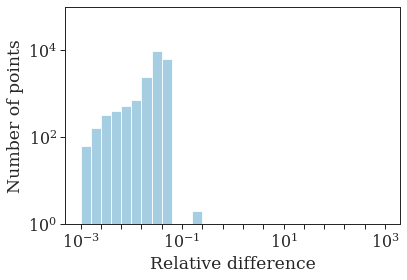

In [21]:
plt.hist(relDiff,bins=np.logspace(-3,3,31))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Relative difference')
plt.ylabel('Number of points')
plt.ylim(1.,1e5)
plt.xticks(np.logspace(-3,3,16))
plt.show()

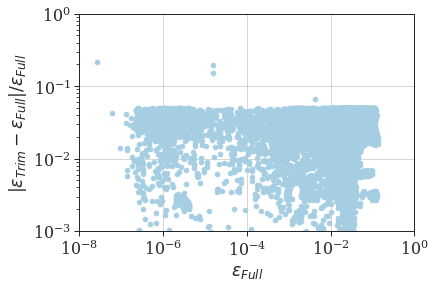

In [30]:
plt.scatter(results[:,-2],relDiff)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-3,1)
plt.xlim(1e-8,1)
plt.grid()
plt.xlabel(r'$\epsilon_{Full}$')
plt.ylabel(r'$|\epsilon_{Trim}-\epsilon_{Full}|/\epsilon_{Full}$')
plt.show()